In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#importing the functions for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [5]:
mnist  = tf.keras.datasets.mnist  #downloading the dataset

In [6]:
mnist

<module 'keras.api.datasets.mnist' from '/home/saurav/base_env/lib/python3.10/site-packages/keras/api/datasets/mnist/__init__.py'>

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

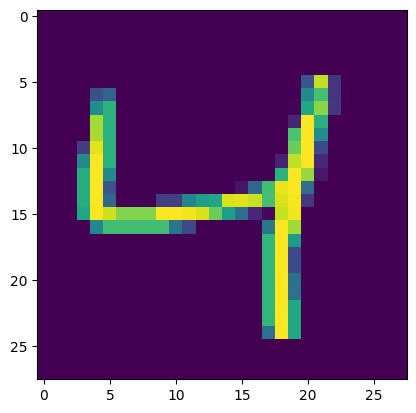

In [12]:
plt.imshow(x_train[2])

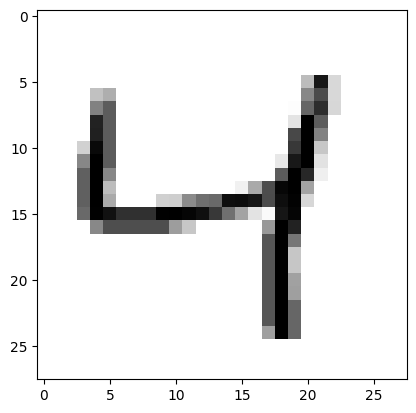

In [13]:
#now showing binary image
plt.imshow(x_train[2], cmap = plt.cm.binary)

In [14]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

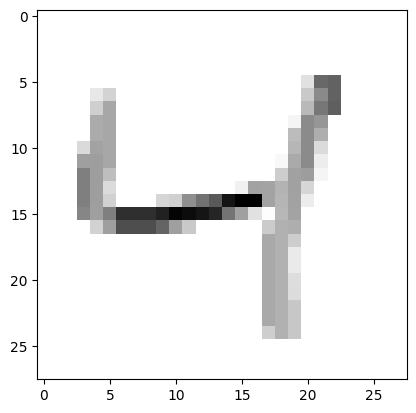

In [15]:
#normalizing the dataset in range 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[2], cmap = plt.cm.binary)

In [16]:
print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
#resizing image to the suitable size to apply convolutional operation
IMG_SIZE = 28
x_train_resized = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #increasing a dimension for kernel operation
x_test_resized = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    #same operation as above
print(x_train_resized.shape)
print(x_test_resized.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Creating a deep learning architecture of Deep Neural Network

In [18]:
x_train_resized.shape[1:]

(28, 28, 1)

In [19]:
model = Sequential()

#first convolution layer
model.add(Conv2D(64,(3,3), input_shape = x_train_resized.shape[1:]))
model.add(Activation("relu"))  #adding non-linearity
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#flattening the final layer of convolution operation for the  operation of fully connected layer
model.add(Flatten())

#fully connected layer 1
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#fully connected layer 3
model.add(Dense(16))
model.add(Activation("relu"))

#now for the last fully connected layer, we should have the output equals to no. of classes
model.add(Dense(10))
model.add(Activation('softmax')) #this activation function normalizes all the values in range of 0 to 1
                                 #which is the probability value of that class


/home/saurav/base_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,434 (318.10 KB)

 Trainable params: 81,434 (318.10 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
len(x_train_resized)

60000

In [22]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [23]:
model.fit(x_train_resized, y_train, epochs=5, validation_split=0.3)  #training our model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7293 - loss: 0.8249 - val_accuracy: 0.9475 - val_loss: 0.1713
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9577 - loss: 0.1434 - val_accuracy: 0.9673 - val_loss: 0.1030
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9733 - loss: 0.0871 - val_accuracy: 0.9657 - val_loss: 0.1158
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9798 - loss: 0.0680 - val_accuracy: 0.9762 - val_loss: 0.0766
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9848 - loss: 0.0524 - val_accuracy: 0.9748 - val_loss: 0.0896


In [24]:
#testing our model
test_loss, test_accuracy = model.evaluate(x_test_resized, y_test)
print("test loss on 10k samples: ",test_loss)
print("validation accuracy on 10k test samples: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9704 - loss: 0.0980
test loss on 10k samples:  0.08541544526815414
validation accuracy on 10k test samples:  0.9750999808311462


In [25]:
predictions = model.predict([x_test_resized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [26]:
predictions[2]

array([1.7155439e-06, 9.9999750e-01, 1.4877069e-10, 3.6728492e-11,
       6.8142339e-07, 5.0049496e-11, 1.2555013e-07, 7.4436053e-09,
       6.3257697e-09, 4.2129595e-11], dtype=float32)

5


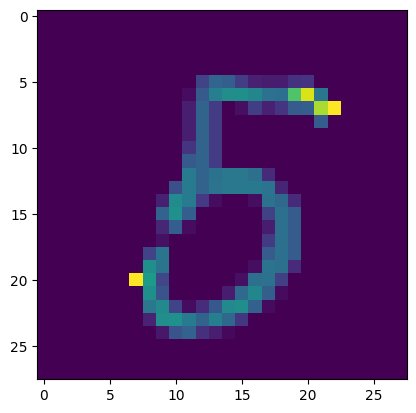

In [40]:
index = 45
print(np.argmax(predictions[index]))
plt.imshow(x_test_resized[index])